**Python version:**  3.x

In [1]:
# set the path of the directories where your modules and files are
modulesPath = 'C:\\Users\loren\Documents\Progetti\__repo__\_myModules'
filesPath = 'C:\\Users\loren\Documents\Progetti\Scuola\AdvDataMining\_files'

#### Moduli

In [2]:
import os
import sys

if os.path.isdir(modulesPath) and modulesPath not in sys.path:
    sys.path.append(modulesPath)

modulesList = os.listdir(modulesPath)
print('Available Modules for the project:', modulesList, sep='\n', end='\n\n')

filesList = os.listdir(filesPath)
print('Available Files for the project:', filesList, sep='\n')

%matplotlib inline

import df_handle
import data_understanding
import data_preparation
import modeling
import model_evaluation

Available Modules for the project:
['data_preparation.py', 'data_understanding.py', 'df_handle.py', 'modeling.py', 'model_evaluation.py', '__pycache__']

Available Files for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt']


IndentationError: expected an indented block (data_preparation.py, line 32)

In [3]:
X_train, X_test, y_train, y_test = df_handle.ml_setup(trainFile_name='datatraining.txt', y_name='Occupancy',
                                                      testFile_name='datatest.txt', search_in_folder=filesPath)
del X_train['date']
del X_test['date']

X_train

Temperature  Humidity  Light         CO2  HumidityRatio
1           23.18   27.2720  426.0  721.250000       0.004793
2           23.15   27.2675  429.5  714.000000       0.004783
3           23.15   27.2450  426.0  713.500000       0.004779
4           23.15   27.2000  426.0  708.250000       0.004772
5           23.10   27.2000  426.0  704.500000       0.004757
...           ...       ...    ...         ...            ...
8139        21.05   36.0975  433.0  787.250000       0.005579
8140        21.05   35.9950  433.0  789.500000       0.005563
8141        21.10   36.0950  433.0  798.500000       0.005596
8142        21.10   36.2600  433.0  820.333333       0.005621
8143        21.10   36.2000  447.0  821.000000       0.005612

[8143 rows x 5 columns]

# \Decision Tree Classifier\

In [5]:
# per conoscere tutti i possibili iper-parametri del modello:
modeling.DecisionTreeClassifier().get_params(deep=False)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [4]:
#fitting del miglior modello
clf = modeling.fit_best_clf(X_train=X_train, y_train=y_train,
                            model=modeling.DecisionTreeClassifier(max_depth=1),
                            nbr_iter=100,
                            params_domain_dic={'min_samples_split': range(1,1000),
                                               'min_samples_leaf': range(1,1000)},
                            score_metric='f1')

Best values for searched parameters: 
{'min_samples_split': 666, 'min_samples_leaf': 826}


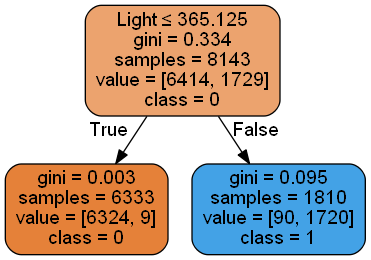

In [7]:
modeling.tree_plot(tree_clf=clf, X_train=X_train, tree_depth=1, y_names=['0', '1'])

## Validazione del Modello

In [8]:
model_evaluation.validate_clf(clf=clf, X_train=X_train, y_train=y_train)

Accuracy at a 95 percent confidence interval: 0.98 (+/- 0.05)

Weighted Average F1 Score at a 95 percent confidence interval: 0.98 (+/- 0.04)


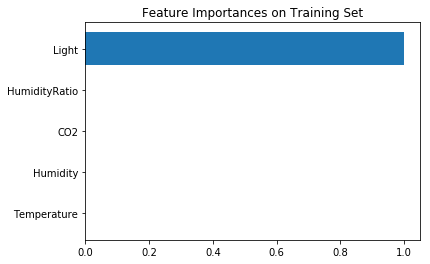

In [9]:
model_evaluation.feature_importance(estimator=clf, X_train=X_train, y_train=y_train)

In [10]:
max(clf.feature_importances_)

1.0

## Test del modello

Accuracy: 0.9786116322701689

F1-score: [0.98290855 0.97142857]

Weighted Average F1-score: 0.9787214781780913

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665




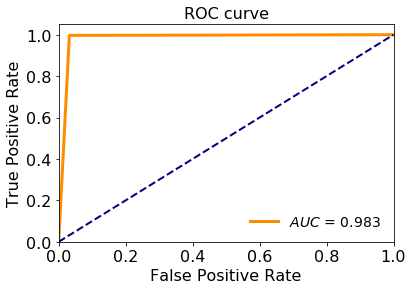

In [11]:
model_evaluation.test_clf(clf=clf, X_test=X_test, y_test=y_test)

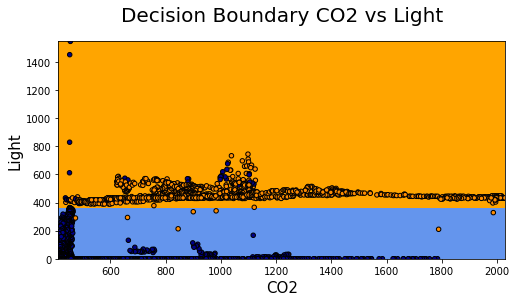

In [12]:
model_evaluation.decision_boundary_clf(clf=clf, X=X_train[['CO2', 'Light']], y=y_train, mesh_step=1)

# Export risultati migliori

In [13]:
#df_handle.export_results(X_test=X_test, y_test=y_test, estimator=clf,
#                         exoprt_path=modulesPath, outFileName='DecisionTree_pred_results')

# \K-NN\

In [61]:
X_train_std, X_test_std = data_preparation.standardize_df(X_train=X_train, X_test=X_test)

In [62]:
modeling.KNeighborsClassifier().get_params(deep=False)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [63]:
clf = modeling.fit_best_clf(X_train=X_train_std, y_train=y_train,
                            model=modeling.KNeighborsClassifier(),
                            nbr_iter=30,
                            params_domain_dic = {'n_neighbors': range(1, 50),
                                                 'weights': ['uniform', 'distance']},
                            score_metric='f1')

Best values for searched parameters: 
{'weights': 'uniform', 'n_neighbors': 46}


## Validazione del Modello

In [57]:
model_evaluation.validate_clf(clf=clf, X_train=X_train_std, y_train=y_train)

Accuracy at a 95 percent confidence interval: 0.95 (+/- 0.08)

Weighted Average F1 Score at a 95 percent confidence interval: 0.95 (+/- 0.07)


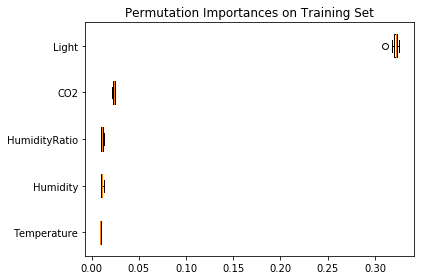

In [18]:
model_evaluation.feature_importance(estimator=clf, X_train=X_train_std, y_train=y_train)

## Test del modello

Accuracy: 0.9594746716697936

F1-score: [0.96843951 0.94339623]

Weighted Average F1-score: 0.9593055237945249

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1693
           1       0.96      0.93      0.94       972

    accuracy                           0.96      2665
   macro avg       0.96      0.95      0.96      2665
weighted avg       0.96      0.96      0.96      2665




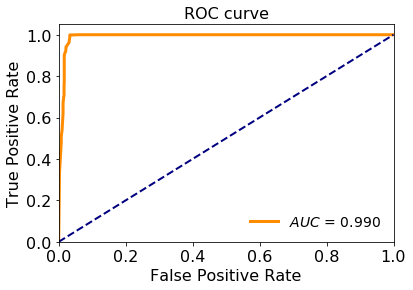

In [64]:
model_evaluation.test_clf(clf=clf, X_test=X_test_std, y_test=y_test)

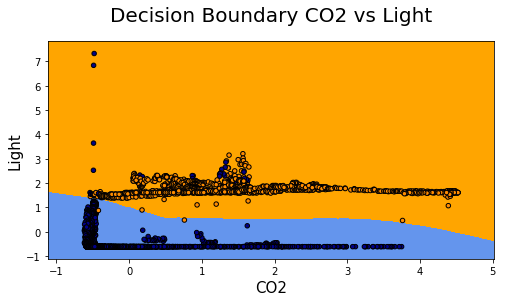

In [20]:
model_evaluation.decision_boundary_clf(clf=clf, X=X_train_std[['CO2', 'Light']], y=y_train, mesh_step=0.01)

# \Naive Bayes\

In [22]:
#seleziona il modello
clf = modeling.GaussianNB()

#fitta il modello
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Validazione del Modello

In [23]:
model_evaluation.validate_clf(clf=clf, X_train=X_train, y_train=y_train)

Accuracy at a 95 percent confidence interval: 0.96 (+/- 0.05)

Weighted Average F1 Score at a 95 percent confidence interval: 0.96 (+/- 0.05)


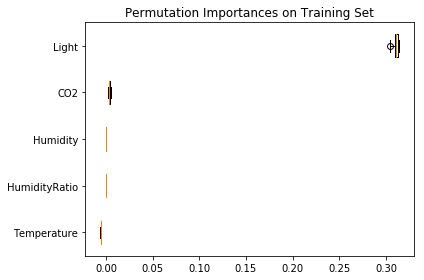

In [24]:
model_evaluation.feature_importance(estimator=clf, X_train=X_train, y_train=y_train)

## Test del modello

Accuracy: 0.9774859287054409

F1-score: [0.98201439 0.96990973]

Weighted Average F1-score: 0.9775994808564882

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665




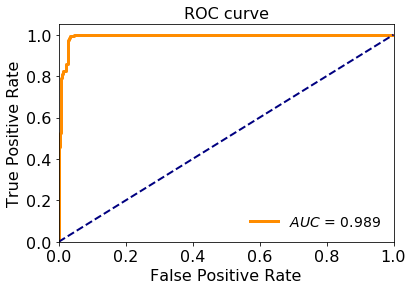

In [25]:
model_evaluation.test_clf(clf=clf, X_test=X_test, y_test=y_test)

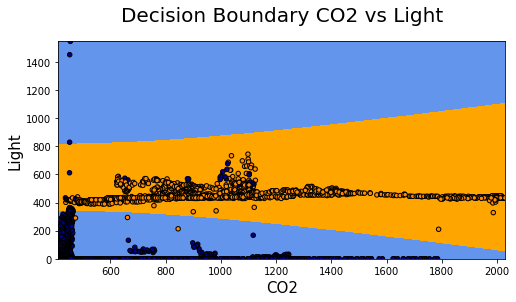

In [26]:
model_evaluation.decision_boundary_clf(clf=clf, X=X_train[['CO2', 'Light']], y=y_train, mesh_step=1)

# \Logistic Regression\

In [28]:
#seleziona il modello
clf = modeling.LogisticRegression(random_state=0)

#fitta il modello
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
print('Coefficients:', clf.coef_, sep='\n', end='\n\n')
print('Intercept:', clf.intercept_, sep='\n')

Coefficients:
[[-1.39934877 -0.03740096  0.02054513  0.00615538 -0.09891164]]

Intercept:
[19.31754626]


In [30]:
X_train.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

## Validazione del Modello

In [31]:
model_evaluation.validate_clf(clf=clf, X_train=X_train, y_train=y_train)

Accuracy at a 95 percent confidence interval: 0.98 (+/- 0.03)

Weighted Average F1 Score at a 95 percent confidence interval: 0.98 (+/- 0.03)


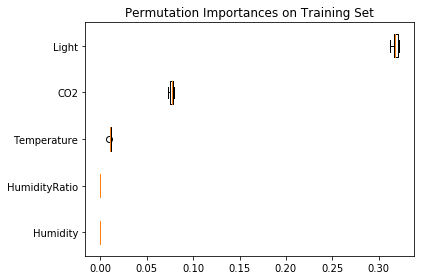

In [32]:
model_evaluation.feature_importance(estimator=clf, X_train=X_train, y_train=y_train)

## Test del modello

Accuracy: 0.976360225140713

F1-score: [0.98114337 0.96832579]

Weighted Average F1-score: 0.9764684410933763

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665




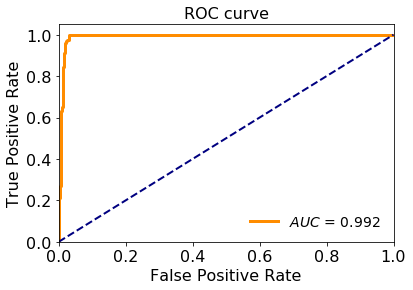

In [33]:
model_evaluation.test_clf(clf=clf, X_test=X_test, y_test=y_test)

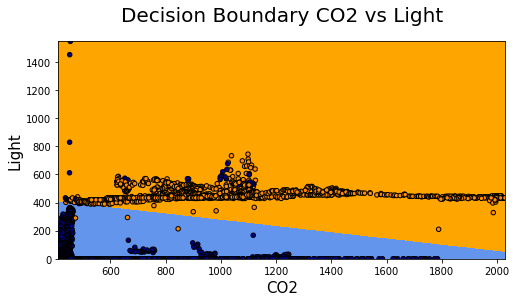

In [34]:
model_evaluation.decision_boundary_clf(clf=clf, X=X_train[['CO2', 'Light']], y=y_train, mesh_step=1)

# -------  Nuovo Dataset:


# solo 'Light' in input

Feature più importante secondo il Decision Tree:  'Light'

Coefficient: [[0.0247423]]

Intercept: [-8.75215609]




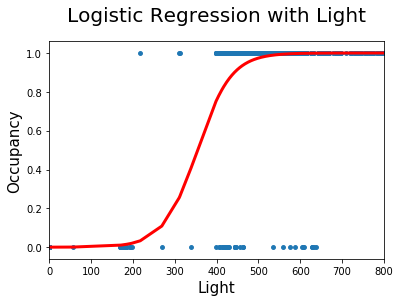



Model Validation on Training Set


Accuracy at a 95 percent confidence interval: 0.98 (+/- 0.05)

Weighted Average F1 Score at a 95 percent confidence interval: 0.98 (+/- 0.05)



Model Test on Test Set


Accuracy: 0.9786116322701689

F1-score: [0.98290855 0.97142857]

Weighted Average F1-score: 0.9787214781780913

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665




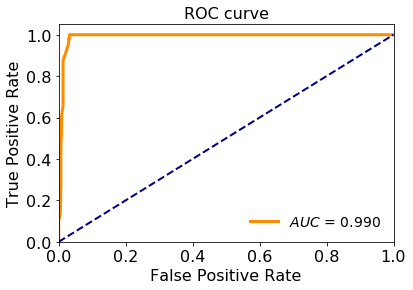

In [35]:
modeling.oneDim_logisticReg(X_train, X_test, y_train, y_test, x='Light', x_max=800, y='Occupancy')

# -------  Nuovo Dataset:
# Regression in 2 dimensions. predire 'Light' tramite 'Temperature'

In [36]:
x = 'Temperature'
y = 'Light'

new_X_train = X_train[[x]]
new_X_test = X_test[[x]]

new_y_train = X_train[y]
new_y_test = X_test[y]

# \Linear Regression\

Coefficients: 
 [124.47428423]

Intercept: 
 -2447.026303038036


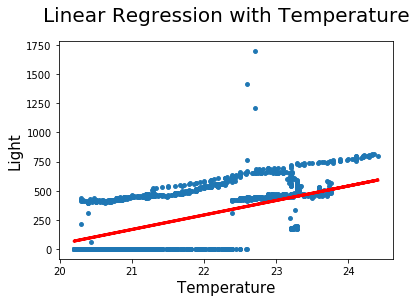

Model Test on Test Set

R2: 0.512
MSE: 30530.250
MAE: 152.073


In [37]:
modeling.oneDim_linearReg(X_train=new_X_train, X_test=new_X_test, y_train=new_y_train, y_test=new_y_test, x=x, y=y)

# ------- Nuovo dataset:

# Predire 'Light' tramite tutti gli altri attributi

Feature più importante secondo il Decision Tree:  'Light'

In [38]:
attributo='Light'

selected_columns = X_train.columns.difference([attributo])

new_X_train = X_train[selected_columns]
new_X_test = X_test[selected_columns]

new_y_train = X_train[attributo]
new_y_test = X_test[attributo]

In [39]:
new_X_train.columns

Index(['CO2', 'Humidity', 'HumidityRatio', 'Temperature'], dtype='object')

# \Linear Regression\

In [41]:
#seleziona il modello
reg = modeling.LinearRegression()

#fitta il modello
reg.fit(new_X_train, new_y_train)

print('Coefficients: \n', reg.coef_, end='\n\n')
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 5.73942904e-01  1.99727669e+02 -1.38230452e+06  3.54978233e+02]

Intercept: 
 -7348.062921885577


## Test del modello

In [42]:
model_evaluation.test_reg(reg, new_X_test, new_y_test)

R2: 0.543
MSE: 28603.062
MAE: 136.903


# \Lasso\

In [44]:
reg = modeling.Lasso()

reg.fit(new_X_train, new_y_train)


print('Coefficients: \n', reg.coef_, end='\n\n')
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.35181318 -5.89903946 -0.         58.07430808]

Intercept: 
 -1139.5194284753932


## Test del modello

In [45]:
model_evaluation.test_reg(reg, new_X_test, new_y_test)

R2: 0.594
MSE: 25415.886
MAE: 131.483


# \Ridge\

In [47]:
reg = modeling.Ridge()

reg.fit(new_X_train, new_y_train)


print('Coefficients: \n', reg.coef_, end='\n\n')
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [  0.3477621   -5.78251719 -15.82717156  59.82726223]

Intercept: 
 -1176.1437276088775


## Test del modello

In [48]:
model_evaluation.test_reg(reg, new_X_test, new_y_test)

R2: 0.595
MSE: 25364.214
MAE: 131.360
